<a href="https://colab.research.google.com/github/krish-333/TECH-LAB-AND-DWP/blob/main/final_project_KRISH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:
# Load the dataset
file_path = "/content/walmart_uncleaned.csv"
df = pd.read_csv(file_path)


In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         10200 non-null  int64  
 1   Date          10200 non-null  object 
 2   Dept          10200 non-null  int64  
 3   Weekly_Sales  9500 non-null   float64
 4   IsHoliday     10200 non-null  int64  
 5   MarkDown1     10200 non-null  float64
 6   MarkDown2     10200 non-null  float64
 7   MarkDown3     10200 non-null  float64
 8   CPI           9500 non-null   float64
 9   Unemployment  9500 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 797.0+ KB

First 5 Rows:
   Store        Date  Dept  Weekly_Sales  IsHoliday  MarkDown1  MarkDown2  \
0     11  10/22/2010    82           NaN          0       0.00       0.00   
1     12   7/22/2011    17      10772.94          0       0.00       0.00   
2      1  12/24/2010     8           NaN          0

In [ ]:
# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Store             0
Date              0
Dept              0
Weekly_Sales    700
IsHoliday         0
MarkDown1         0
MarkDown2         0
MarkDown3         0
CPI             700
Unemployment    700
dtype: int64


In [ ]:
# Handling Missing Data
num_imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['number']))
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))


In [ ]:
# Checking for missing values after imputation
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Store           0
Date            0
Dept            0
Weekly_Sales    0
IsHoliday       0
MarkDown1       0
MarkDown2       0
MarkDown3       0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Encoding Categorical Data
if 'IsHoliday' in df.columns:
    df['IsHoliday'] = LabelEncoder().fit_transform(df['IsHoliday'])
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [ ]:
# Handling DateTime Data
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df.drop(columns=['Date'], inplace=True)

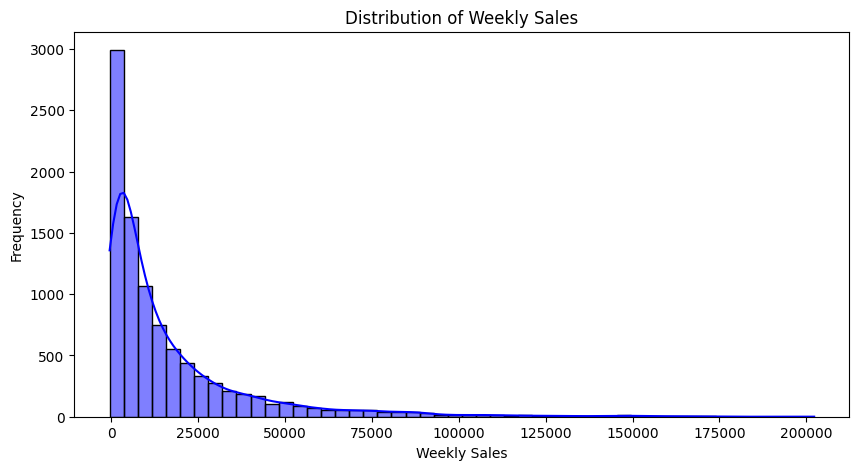

In [ ]:
#plotting distribution of weekly sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color='blue')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


<ipython-input-46-f8c849ed01b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['IsHoliday'], y=df['Weekly_Sales'], palette='coolwarm')


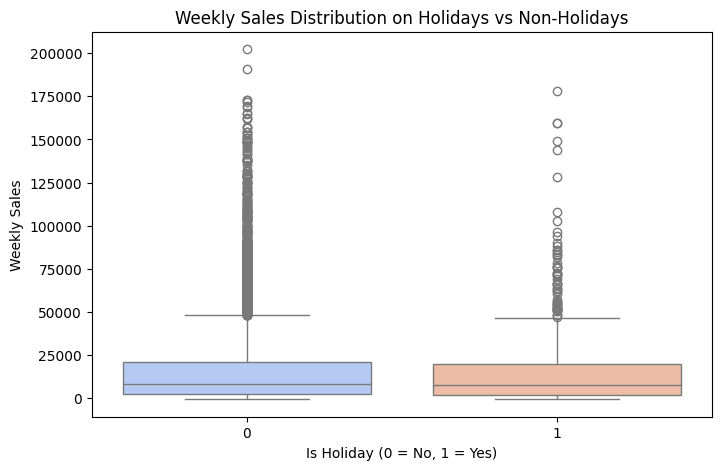

In [ ]:
#plot for sales distribution on holiday vs normal day
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['IsHoliday'], y=df['Weekly_Sales'], palette='coolwarm')
plt.title("Weekly Sales Distribution on Holidays vs Non-Holidays")
plt.xlabel("Is Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()


We saw that there is no difference in sales on holidays and non holiday

Now lets train and test the machine learning models

In [ ]:
# Model Training Code
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.01422477325576732


In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree R2 Score: 0.5930507612072757


In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest R2 Score: 0.7495354335425839


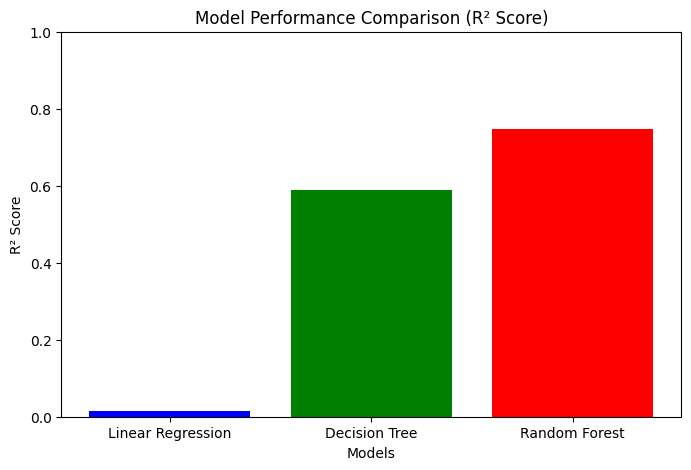

In [ ]:
import matplotlib.pyplot as plt

# Model Names
models = ["Linear Regression", "Decision Tree", "Random Forest"]

# R² Scores (Replace with your actual values)
r2_scores = [ r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)]

# Create Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.ylim(0, 1)  # R² Score is between 0 and 1

# Show the Plot
plt.show()


The accuracy or R2 scores suggest that the data is not linear as a result the linear regression is giveg -ve accuracy score. Random Forest has the best accuracy score of 74%


Let's check the errors for the fitted random forest model

In [ ]:
#mean absolute error
mean_absolute_error(y_test, y_pred_rf)

0.2536450843621535

In [ ]:
#mean square error
mean_squared_error(y_test, y_pred_rf)

0.24809688130622637

The errors are very less which indicate a good model fit

 Trying to implement Gradient Boosting Regression to predict sales if it is better


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MAE: {mae}")
print(f"Gradient Boosting MSE: {mse}")
print(f"Gradient Boosting R² Score: {r2}")


Gradient Boosting MAE: 0.36595049282339753
Gradient Boosting MSE: 0.33884800530863324
Gradient Boosting R² Score: 0.6538533478350829


We can see that it has even more error and lesser R2 score than Random Forest so we can not consider this

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict sales amounts
y_pred_sales_rf = rf.predict(X_test)

# Display predicted sales
print("Predicted Sales Amounts (Random Forest):")
print(y_pred_sales_rf)


Predicted Sales Amounts (Random Forest):
[ 259.48855  8506.34275  6737.579375 ... 9298.95595  9432.113675
 9889.924825]


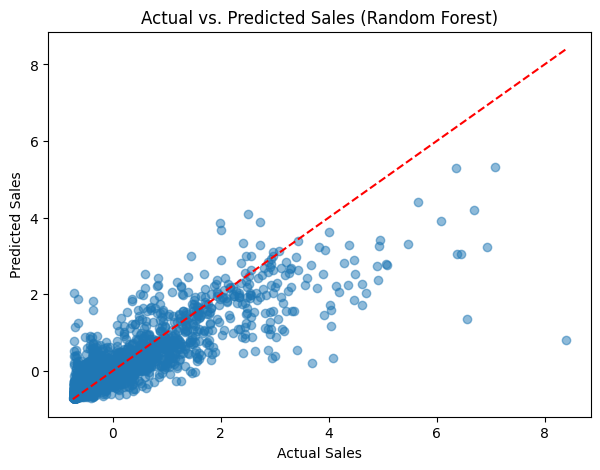

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_sales_rf, alpha=0.5)  # Plot actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red')  # 45-degree line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Random Forest)")
plt.show()


We can see that the estimated and fitted values are almost on the same line so we can say that the model is a good fit


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# You can try increasing the number of estimators and tree depth
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Improved Manual Tuning - MSE:", mse)
print("Improved Manual Tuning - R² Score:", r2)


Improved Manual Tuning - MSE: 0.6708960439944925
Improved Manual Tuning - R² Score: 0.3146531307809832
